In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

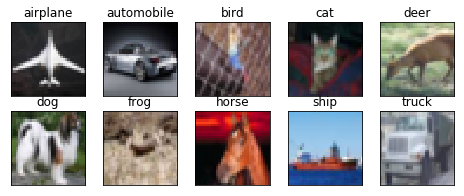

In [31]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [42]:
from keras import regularizers

weight_decay = 1e-4

# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3))) # RF 3x3
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) # RF 5x5
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # RF 10x10
model.add(Dropout(0.20))

model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) # RF 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) # RF 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # RF 10x10
model.add(Dropout(0.30))

model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) # RF 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(weight_decay))) # RF 12x12
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # RF 10x10
model.add(Dropout(0.40))

model.add(Convolution2D(10, 4, 4))

model.add(Flatten())
model.add(Activation('softmax'))
 


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API:

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_69 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_53 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_70 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_54 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=99)`
  if sys.path[0] == '':


Epoch 1/99
390/390 [==============================] - 13s 34ms/step - loss: 1.7881 - acc: 0.4489 - val_loss: 1.2342 - val_acc: 0.5841
Epoch 2/99
390/390 [==============================] - 10s 25ms/step - loss: 1.2205 - acc: 0.6131 - val_loss: 1.2055 - val_acc: 0.6258
Epoch 3/99
390/390 [==============================] - 9s 24ms/step - loss: 1.0200 - acc: 0.6849 - val_loss: 0.9123 - val_acc: 0.6994
Epoch 4/99
390/390 [==============================] - 9s 24ms/step - loss: 0.9334 - acc: 0.7134 - val_loss: 0.8197 - val_acc: 0.7410
Epoch 5/99
390/390 [==============================] - 9s 24ms/step - loss: 0.8741 - acc: 0.7412 - val_loss: 0.7352 - val_acc: 0.7673
Epoch 6/99
390/390 [==============================] - 9s 24ms/step - loss: 0.8988 - acc: 0.7392 - val_loss: 1.9909 - val_acc: 0.4662
Epoch 7/99
390/390 [==============================] - 9s 24ms/step - loss: 0.9209 - acc: 0.7397 - val_loss: 1.4435 - val_acc: 0.5723
Epoch 8/99
390/390 [==============================] - 9s 24ms/step 

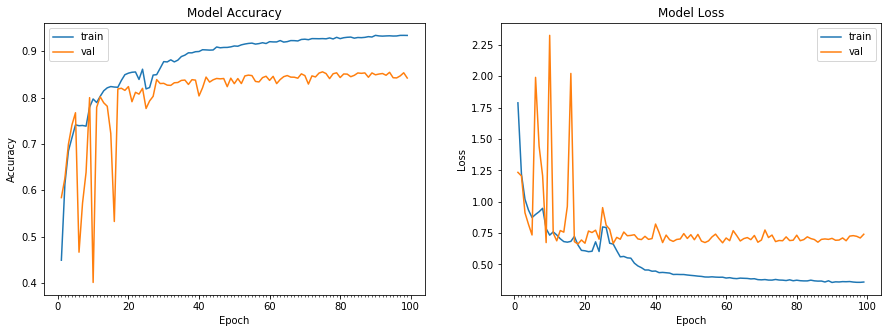

Accuracy on test data is: 84.23


In [44]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 99, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))